In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
range_min= 0.45
range_max= 10.0
angle_min= -0.521567881107
angle_max= 0.524276316166
angle_increment= 0.00163668883033

In [5]:
a=!cat ranges.txt

In [6]:
ranges = np.array([float(x) for x in a[0].strip().strip('[]').split(',')])

In [7]:
ranges[:10]

array([3.58638954, 3.58474302, 3.58310175, 3.58146667, 3.5782125 ,
       3.57659388, 3.57498074, 3.57337379, 3.57177234, 3.57017684])

In [8]:
angles = np.arange(angle_min,angle_max,angle_increment)

readings = list(zip(angles,ranges) )

readings[:3]

In [9]:
x = ranges * np.cos(angles)
y = ranges * np.sin(angles)

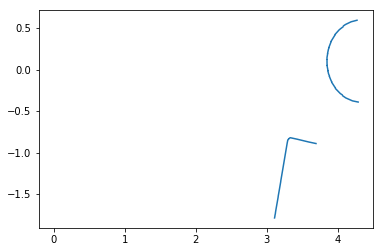

In [10]:
plt.plot(x,y)
plt.plot([0],[0])

In [11]:
x, y = np.mgrid[-10:10:0.1, -10:10:0.1]
z = x+y

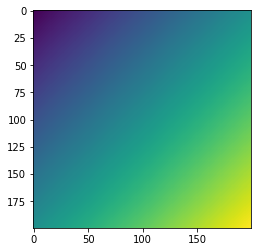

In [12]:
plt.imshow(z)

In [13]:
r,phi = np.mgrid[range_min:range_max:0.01,angle_min:angle_max:angle_increment]

In [14]:
r.shape

(955, 640)

In [15]:
rngs = np.tile(ranges,(r.shape[0],1))
rngs[np.isnan(rngs)] = 11
rngs

array([[ 3.58638954,  3.58474302,  3.58310175, ..., 11.        ,
        11.        , 11.        ],
       [ 3.58638954,  3.58474302,  3.58310175, ..., 11.        ,
        11.        , 11.        ],
       [ 3.58638954,  3.58474302,  3.58310175, ..., 11.        ,
        11.        , 11.        ],
       ...,
       [ 3.58638954,  3.58474302,  3.58310175, ..., 11.        ,
        11.        , 11.        ],
       [ 3.58638954,  3.58474302,  3.58310175, ..., 11.        ,
        11.        , 11.        ],
       [ 3.58638954,  3.58474302,  3.58310175, ..., 11.        ,
        11.        , 11.        ]])

In [16]:
v = np.zeros(r.shape)

In [17]:
v[phi<angle_min] = 0
v[phi>angle_max] = 0

In [18]:
v[r>rngs] = 0
v[r<rngs] = -1
v[np.abs(r-rngs)<0.1] =1

In [19]:
v

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.],
       [ 0.,  0.,  0., ..., -1., -1., -1.]])

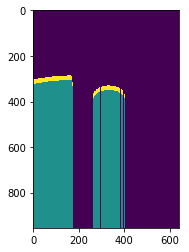

In [20]:
plt.imshow(v)

In [21]:
from scipy.ndimage import geometric_transform

In [22]:
def same(x):
    return (x)

def rescale(min2, max2, min1, max1, f=same):
    def aux(x1,min1, max1, min2, max2):
        return (x1-min1)/(max1-min1)*(max2-min2)+min2
    def ret(output):
        x1,y1 = f(output)
        return (aux(x1,min1[0],max1[0],min2[0],max2[0]),aux(y1,min1[1],max1[1],min2[1],max2[1]))
    return ret
    
def cart2polar(f=same):
    def ret(output):
        x,y = f(output)
        r = np.sqrt(x*x+y*y)
        phi = np.arctan2(y, x)
        phi = (phi + np.pi)%(np.pi *2) -np.pi
        return (r,phi)
    return ret

In [23]:
transform = rescale((-45,0),(955,639),(0,angle_min),(100,angle_max),cart2polar(rescale((0,-50),(100,50),(0,0),(400,400))))

In [24]:
z = geometric_transform(v, transform, output_shape=(400,400), mode='constant')
z.shape

(400, 400)

In [25]:
plt.rcParams['figure.figsize'] = [10, 10]

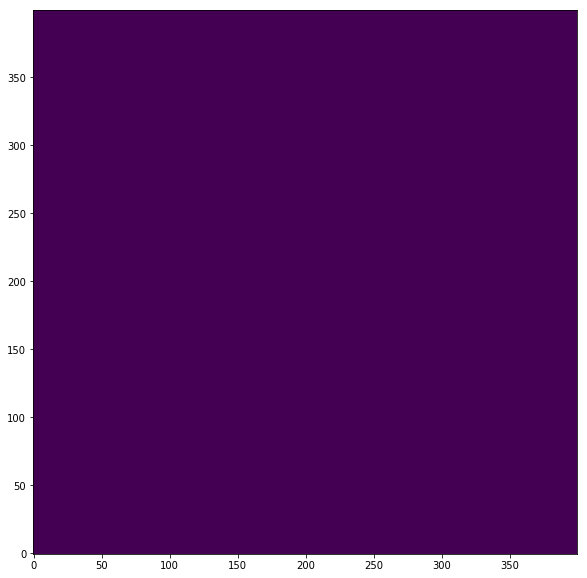

In [26]:
plt.imshow(z,origin='lower')

In [28]:
import cv2

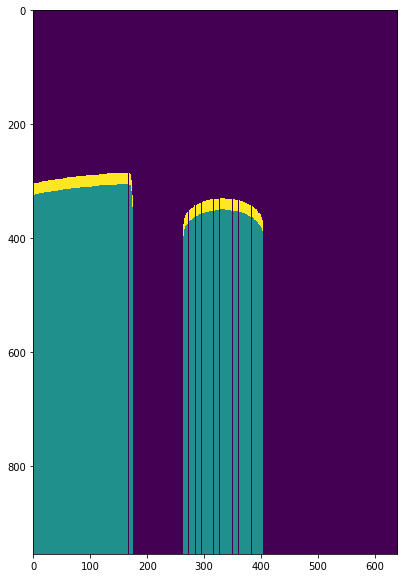

In [33]:
plt.imshow(v)

In [51]:
dst = cv2.linearPolar(v.T, (320,400),100,cv2.WARP_FILL_OUTLIERS | cv2.WARP_INVERSE_MAP)

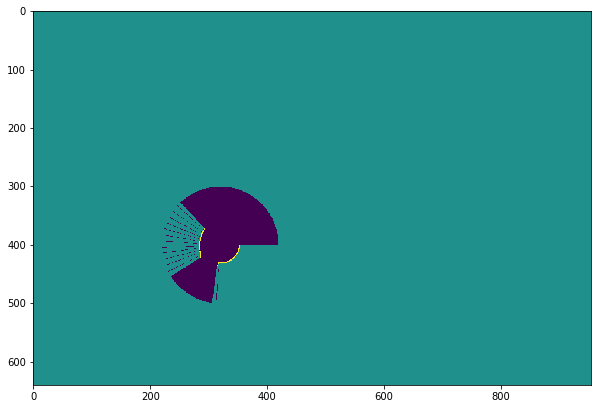

In [52]:
plt.imshow(dst)